<a href="https://colab.research.google.com/github/norhum/deep_learning/blob/main/hero_from_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Linear regression model
import torch
import torch.nn as nn
import torch.optim as optim

x = torch.randn(100,1)
noise = torch.randn(100,1)

y = 2*x + 3 + noise

x[:5], y[:5]

(tensor([[-0.0412],
         [ 0.0568],
         [ 1.4272],
         [-1.4646],
         [ 0.2362]]),
 tensor([[4.2682],
         [1.3415],
         [7.1484],
         [2.1099],
         [5.0105]]))

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)
    # self.weight = nn.parameter(torch.randn(1))
    # self.bias = nn.parameter(torch.randn(1))

  def forward(self, x):
    #return self.weight * x + self.bias
    return self.linear(x)

model = LinearRegressionModel()

In [ ]:
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 100
for epoch in range(epochs):
  y_pred = model(x)
  loss = loss_fn(y_pred, y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss: {loss.item()}')

epoch: 10, loss: 6.726436138153076
epoch: 20, loss: 4.5603203773498535
epoch: 30, loss: 3.2064619064331055
epoch: 40, loss: 2.358696937561035
epoch: 50, loss: 1.8267982006072998
epoch: 60, loss: 1.4923927783966064
epoch: 70, loss: 1.2817018032073975
epoch: 80, loss: 1.1486618518829346
epoch: 90, loss: 1.0644612312316895
epoch: 100, loss: 1.0110456943511963


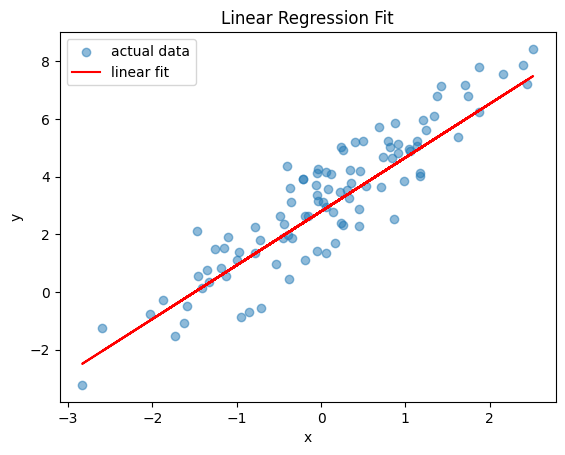

In [ ]:
import matplotlib.pyplot as plt

predicted = model(x).detach().numpy()

plt.scatter(x.numpy(), y.numpy(), label='actual data', alpha=0.5)
plt.plot(x.numpy(), predicted, label='linear fit', color='red')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Epoch 10/100, Loss: 38.656394958496094
Epoch 20/100, Loss: 25.255043029785156
Epoch 30/100, Loss: 16.560855865478516
Epoch 40/100, Loss: 10.897233963012695
Epoch 50/100, Loss: 7.193691253662109
Epoch 60/100, Loss: 4.7633256912231445
Epoch 70/100, Loss: 3.163271427154541
Epoch 80/100, Loss: 2.1067230701446533
Epoch 90/100, Loss: 1.407163143157959
Epoch 100/100, Loss: 0.9428225755691528


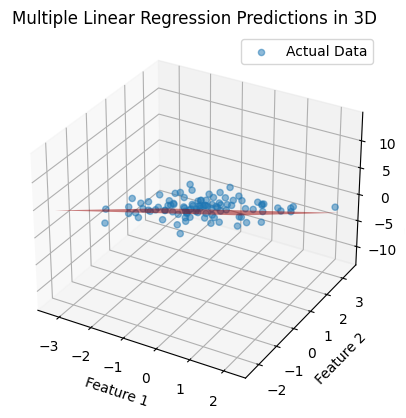

In [ ]:
# Multiple linear regression
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the Multiple Linear Regression model
class MultipleLinearRegressionModel(nn.Module):
    def __init__(self, num_features):
        super(MultipleLinearRegressionModel, self).__init__()
        self.weights = nn.Parameter(torch.randn(num_features))  # Coefficients for features
        self.bias = nn.Parameter(torch.randn(1))                # Bias term

    def forward(self, x):
        return torch.matmul(x, self.weights) + self.bias

# Generate synthetic data for multiple features
num_samples = 100
num_features = 3

# Create random input features
X = torch.randn(num_samples, num_features)  # Shape (100, 3)

# True coefficients and bias
true_weights = torch.tensor([2.0, -3.0, 1.5])  # Shape (3,)
true_bias = 4.0

# Generate target variable with some noise
noise = torch.randn(num_samples) * 0.1  # Noise
y = torch.matmul(X, true_weights) + true_bias + noise  # Shape (100,)

# Instantiate the model
model = MultipleLinearRegressionModel(num_features)

# Loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass: Compute predicted y by passing X to the model
    y_pred = model(X)  # X is (100, 3)

    # Compute the loss
    loss = loss_fn(y_pred, y)  # y must match shape (100,)

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()  # Clear gradients
    loss.backward()        # Backpropagation
    optimizer.step()       # Update the weights

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

# After training, generate predictions
predicted = model(X).detach().numpy()  # Detach to get numpy array for predictions

# 3D Visualization of predictions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
ax.scatter(X[:, 0].numpy(), X[:, 1].numpy(), y.numpy(), label='Actual Data', alpha=0.5)

# Create a grid for the predicted surface
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Prepare input for predictions
X_grid = torch.tensor(np.c_[x1_grid.ravel(), x2_grid.ravel(), np.zeros(x1_grid.size)]).float()  # Set third feature to zero
pred_grid = model(X_grid).detach().numpy().reshape(x1_grid.shape)

# Plot predicted surface
ax.plot_surface(x1_grid, x2_grid, pred_grid, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target Variable')
plt.title('Multiple Linear Regression Predictions in 3D')
plt.legend()
plt.show()


Epoch 10/100, Loss: 7.145033359527588
Epoch 20/100, Loss: 2.311709403991699
Epoch 30/100, Loss: 0.9083412289619446
Epoch 40/100, Loss: 0.4839165508747101
Epoch 50/100, Loss: 0.34413573145866394
Epoch 60/100, Loss: 0.29046472907066345
Epoch 70/100, Loss: 0.26516953110694885
Epoch 80/100, Loss: 0.25077956914901733
Epoch 90/100, Loss: 0.2415345311164856
Epoch 100/100, Loss: 0.2352185696363449


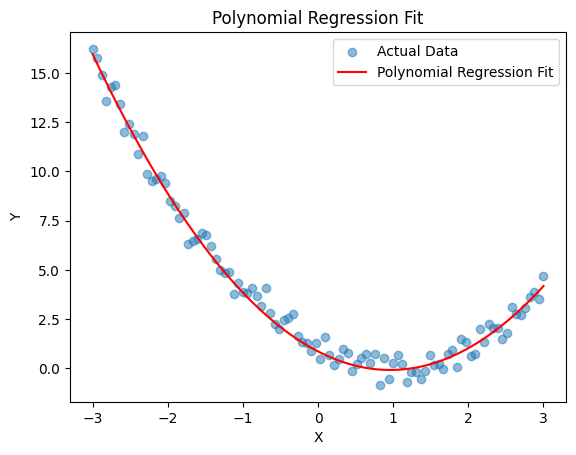

In [ ]:
# polynomial regression
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define the Polynomial Regression model
class PolynomialRegressionModel(nn.Module):
    def __init__(self, num_features):
        super(PolynomialRegressionModel, self).__init__()
        self.weights = nn.Parameter(torch.randn(num_features))  # Coefficients for polynomial features
        self.bias = nn.Parameter(torch.randn(1))                # Bias term

    def forward(self, x):
        return torch.matmul(x, self.weights) + self.bias

# Generate synthetic data for polynomial regression
num_samples = 100
X = torch.linspace(-3, 3, num_samples).view(-1, 1)  # Shape (100, 1)

# True polynomial coefficients for a quadratic equation
true_weights = torch.tensor([1.0, -2.0, 1.0])  # Coefficients for x^2, x, and constant
true_bias = 0.0

# Create polynomial features
X_poly = torch.cat([X**2, X, torch.ones(X.shape)], dim=1)  # Shape (100, 3) -> [x^2, x, 1]

# Generate target variable with some noise
noise = torch.randn(num_samples) * 0.5  # Noise
y = torch.matmul(X_poly, true_weights) + true_bias + noise  # Shape (100,)

# Instantiate the model
model = PolynomialRegressionModel(num_features=X_poly.shape[1])  # num_features = 3

# Loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass: Compute predicted y by passing X_poly to the model
    y_pred = model(X_poly)  # X_poly is (100, 3)

    # Compute the loss
    loss = loss_fn(y_pred, y)  # y must match shape (100,)

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()  # Clear gradients
    loss.backward()        # Backpropagation
    optimizer.step()       # Update the weights

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

# After training, generate predictions
predicted = model(X_poly).detach().numpy()  # Detach to get numpy array for predictions

# Plotting the results
plt.scatter(X.numpy(), y.numpy(), label='Actual Data', alpha=0.5)
plt.plot(X.numpy(), predicted, color='red', label='Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()


(1000, 2) (1000,)
torch.Size([1000, 2]) torch.Size([1000, 1])
Epoch [500/5000], Loss: 0.0703
Epoch [1000/5000], Loss: 0.0576
Epoch [1500/5000], Loss: 0.0495
Epoch [2000/5000], Loss: 0.0417
Epoch [2500/5000], Loss: 0.0355
Epoch [3000/5000], Loss: 0.0296
Epoch [3500/5000], Loss: 0.0254
Epoch [4000/5000], Loss: 0.0857
Epoch [4500/5000], Loss: 0.0186
Epoch [5000/5000], Loss: 0.0139


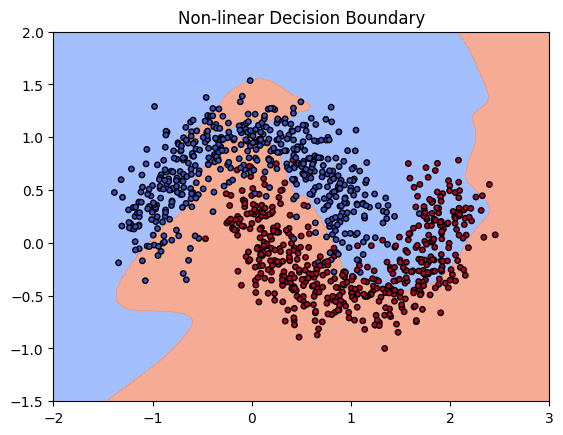

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

# 1. Generate non-linear dataset (moon-shaped)
n_samples = 1000
x, y = make_moons(n_samples=n_samples, noise=0.2, random_state=0)
print(x.shape, y.shape)

# Convert to torch tensors
X = torch.tensor(x, dtype=torch.float32)
Y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
print(X.shape, Y.shape)

# 2. Define the neural network model
class NonLinearClassifier(nn.Module):
    def __init__(self):
        super(NonLinearClassifier, self).__init__()
        self.fc1 = nn.Linear(2, 32)  # Input layer (2 inputs)
        self.fc2 = nn.Linear(32, 64)  # Hidden layer (16 to 32 units)
        self.fc3 = nn.Linear(64, 1)  # Output layer (1 output, binary classification)
        self.bn1 = nn.BatchNorm1d(2)
        self.bn2 = nn.BatchNorm1d(32)
        self.bn3 = nn.BatchNorm1d(64)

    def forward(self, x):
        x = F.gelu(self.fc1(self.bn1(x)))
        x = F.gelu(self.fc2(self.bn2(x)))
        x = torch.sigmoid(self.fc3(self.bn3(x)))
        return x

# Initialize the model, loss function, and optimizer
model = NonLinearClassifier()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.AdamW(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.2)

# 3. Training loop
epochs = 5000
for epoch in range(epochs):
    model.train()

    # Forward pass
    y_pred = model(X)

    # Compute loss
    loss = criterion(y_pred, Y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 4. Plot the results
# Generate a grid of points to visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-1.5, 2, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
with torch.no_grad():
    Z = model(grid).reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.8, cmap='coolwarm')
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', s=15, cmap='coolwarm')
plt.title('Non-linear Decision Boundary')
plt.show()
